### 1. Set Review

In [1]:
A = {2, 4, 6, 8, 10}
B = {1, 2, 3, 4, 5}
C = {4, 5, 6, 7, 8}

# (A \ B) ∪ (A ∩ B) = A
lhs1 = (A - B) | (A & B)
rhs1 = A
print(lhs1 == rhs1)

# A ∪ (B ∩ C) = (A ∪ B) ∩ (A ∪ C)
lhs2 = A | (B & C)
rhs2 = (A | B) & (A | C)
print(lhs2 == rhs2)

# A \ (B ∪ C) = (A \ B) ∩ (A \ C)
lhs3 = A - (B | C)
rhs3 = (A - B) & (A - C)
print(lhs3 == rhs3)

# A \ (B ∩ C) = (A \ B) ∪ (A \ C)
lhs4 = A - (B & C)
rhs4 = (A - B) | (A - C)
print(lhs4 == rhs4)

True
True
True
True


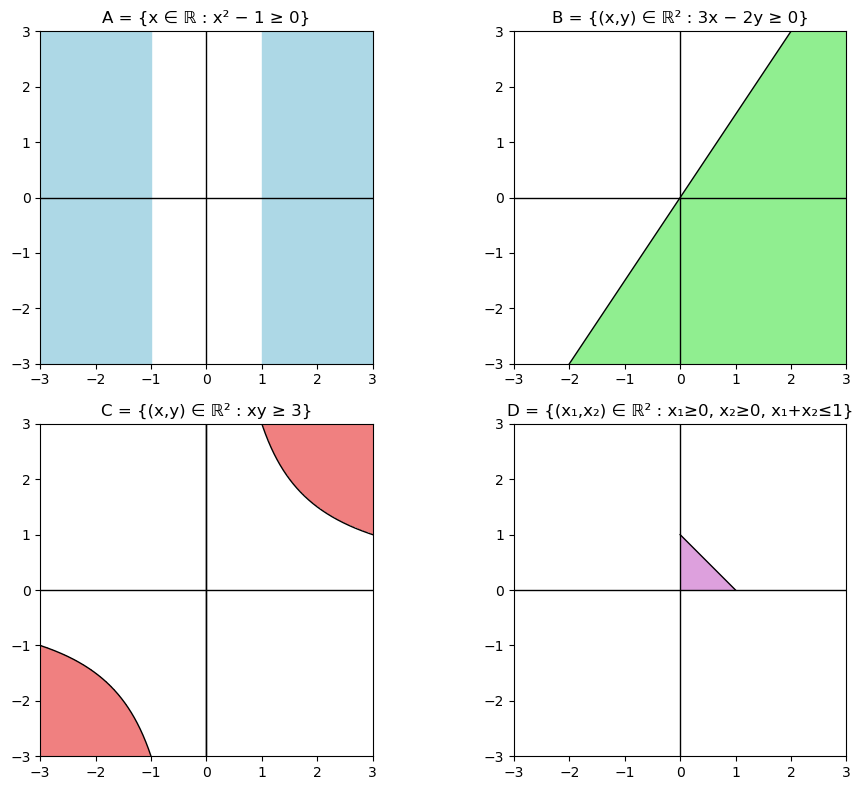

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -3, 3
ymin, ymax = -3, 3
n = 800

x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(x, y)

with np.errstate(divide='ignore', invalid='ignore'):
    maskC = ((X > 0) & (Y >= 3/X)) | ((X < 0) & (Y <= 3/X))
maskB = (3*X - 2*Y >= 0)
maskD = (X >= 0) & (Y >= 0) & (X + Y <= 1)

def shade(ax, mask, color):
    Z = np.zeros_like(mask, dtype=float)
    Z[mask] = 1.0
    ax.imshow(Z, origin='lower', extent=[xmin, xmax, ymin, ymax],
              cmap=plt.matplotlib.colors.ListedColormap(['white', color]),
              vmin=0, vmax=1, interpolation='nearest')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
ax.axvspan(xmin, -1, color='lightblue')
ax.axvspan(1, xmax, color='lightblue')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('A = {x ∈ ℝ : x² − 1 ≥ 0}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[0, 1]
shade(ax, maskB, 'lightgreen')
ax.plot(x, (3/2)*x, 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('B = {(x,y) ∈ ℝ² : 3x − 2y ≥ 0}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[1, 0]
shade(ax, maskC, 'lightcoral')
ax.plot(x[x!=0], 3/x[x!=0], 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('C = {(x,y) ∈ ℝ² : xy ≥ 3}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[1, 1]
shade(ax, maskD, 'plum')
ax.plot([0,1],[1,0], 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('D = {(x₁,x₂) ∈ ℝ² : x₁≥0, x₂≥0, x₁+x₂≤1}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


For \( A = \{1, 2, 3\} \):

$$
\mathcal{P}(A) = \{ \varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\} \}
$$

There are \( 2^3 = 8 \) subsets in total.

## 2. Probability Space Basics

### Rolling a single fair three-sided die

**Sample space**  
$S = \{1, 2, 3\}$

**Number of outcomes**  
$n(S) = 3$

**Probability of each outcome**  
Since the die is fair:
$$
P(1) = P(2) = P(3) = \frac{1}{3}
$$

**Set of all events**  
The power set:
$$
\mathcal{P}(S) = \{\varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\}\}
$$
There are $2^3 = 8$ possible events in total.

---

### Rolling a fair three-sided die twice

**Sample space**
$$
S = \{(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)\}
$$

**Number of outcomes**  
$$
n(S) = 3^2 = 9
$$

**Probability of each outcome**  
Each outcome has probability $\frac{1}{9}$.

**Set of all events**  
The power set has $2^9 = 512$ possible events.

---

### Flipping a fair coin twice

**Sample space**
$$
S = \{\text{HH}, \text{HT}, \text{TH}, \text{TT}\}
$$

**Number of outcomes**  
$$
n(S) = 4
$$

**Probability of each outcome**  
Each outcome has probability $\frac{1}{4}$.

**Set of all events**  
There are $2^4 = 16$ possible events.

---

### Rolling the three-sided die twice and adding the results

**Possible sums**  
$$
\{2, 3, 4, 5, 6\}
$$

| Sum | Outcomes             | Count | Probability |
|:---:|----------------------|:-----:|:-----------:|
|  2  | (1,1)                |   1   | $\frac{1}{9}$ |
|  3  | (1,2), (2,1)         |   2   | $\frac{2}{9}$ |
|  4  | (1,3), (2,2), (3,1)  |   3   | $\frac{3}{9}$ |
|  5  | (2,3), (3,2)         |   2   | $\frac{2}{9}$ |
|  6  | (3,3)                |   1   | $\frac{1}{9}$ |

**Number of outcomes**  
$$
n(S) = 9
$$

**Number of events**  
$$
2^9 = 512
$$



## 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events?



---

-  Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.

---

- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and describe the space of events. What are the probabilities of the outcomes?

---

Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

---

## 4. Roulette

# Planning/Some Answers: 

a) 

I think a df would be best to model spinning the roulette wheel.
Make the columns green, red, or black.

Actually, this would make a "ragged" dataframe. Use a dict instead.

Put an entry for green : 0 three times to represent that it is a bigger space. (Hopefully I am not overcomplicating this, but bigger space should have bigger probability.)

Randomly sample from that dict.

b) 

Each outcome is defined by landing in a different space - 0, 5, 28, 36, etc. Basically all integers between 0 and 36 inclusive. There are 37 of them.

The 137,438,953,472 (2^37) events are all combinations of these 37 distinct integers. So you can have 0, 0 paired with 1, 0 paired with 1 and 2, etc., and then 1, 1 paired with 2, 1 paired with 2 and 3, etc., doing this for all integers.

Probabilities: Each outcome *should* have equal probability, with the exception of the 0, which I'll say has three times the probability since it is 3 times the size. You can picture a grid with 39 squares. Each integer takes up one square except for 0, which takes up 3 squares. So each integer has 1/39 probability, with the exception of 0, which is 3/39 or 1/13.

c) 

After I run the code to generate a spin, I will map the code to a dict(?) that has results for each spin?? Ok that will be impossible, too many events. Write a function that calculates the 36/K-1 or -1 payout.

d)

Will take another function

e) 

Take average.

In [3]:
# a)
import numpy as np

roulette_dict = {"green": [0,37,38], # represents the 3 spots that 0 takes up using distinct nubmmers
                 "red": [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],
                 "black": [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
                 }

def spin_wheel():
    rng = np.random.default_rng()
    landed = np.rng.integers(0,39,1)
    return landed

print(spin_wheel())

AttributeError: module 'numpy' has no attribute 'rng'

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.


HOW TO CHECK IF VALID DISTRIBUTION?? (CDF)

1- Non-decreasing

2- right contiguous

3- satisfies negitive infinity -> 0 and positive infinity -> 1



1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$


In [ ]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


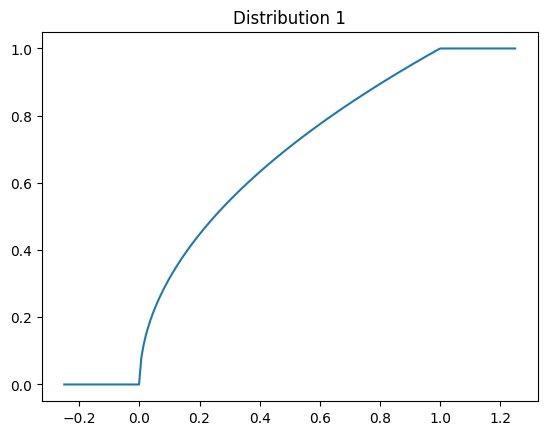

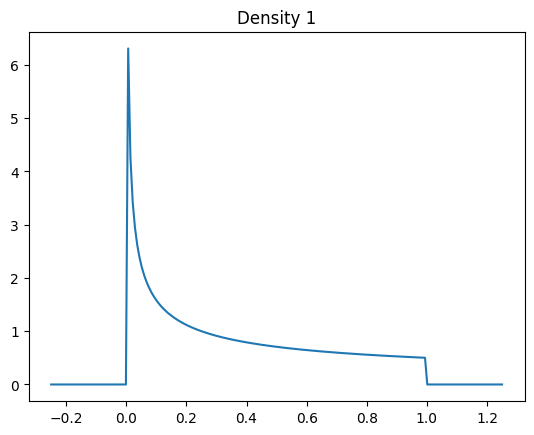

In [ ]:
x = np.linspace(-.25, 1.25, 200)
F = []
f = []

for xi in x:
    # CDF
    if xi <= 0:
        F.append(0)
    elif xi >= 1:
        F.append(1)
    else:
        F.append(np.sqrt(xi))
    # PDF
    if 0 < xi < 1:
        f.append(1 / (2 * np.sqrt(xi)))
    else:
        f.append(0)

plt.plot(x, F); plt.title("Distribution 1"); plt.show()
plt.plot(x, f); plt.title("Density 1"); plt.show()


2. $F(x) = \dfrac{1}{1+e^{-x}}$


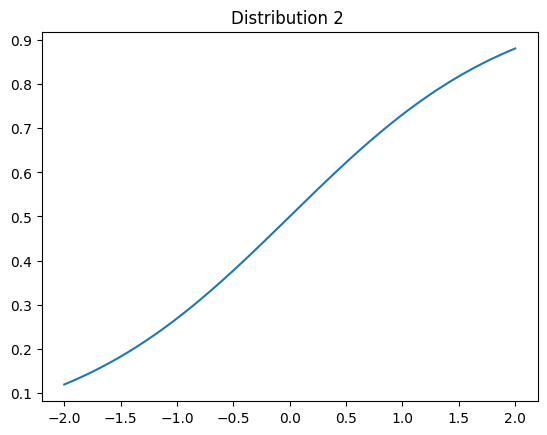

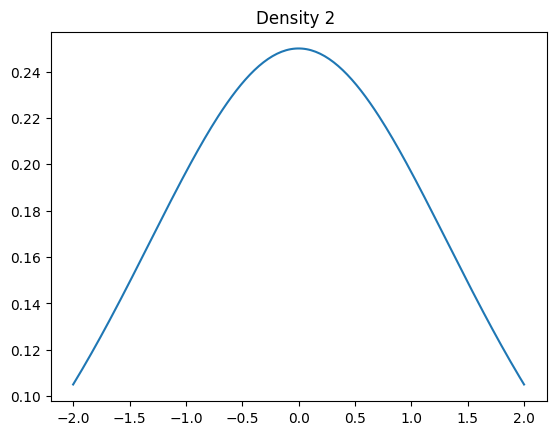

In [ ]:
x = np.linspace(-2, 2, 200)
F = 1 / (1 + np.exp(-x))
f = np.exp(-x) / (1 + np.exp(-x))**2

plt.plot(x, F); plt.title("Distribution 2 "); plt.show()
plt.plot(x, f); plt.title("Density 2 "); plt.show()


3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$


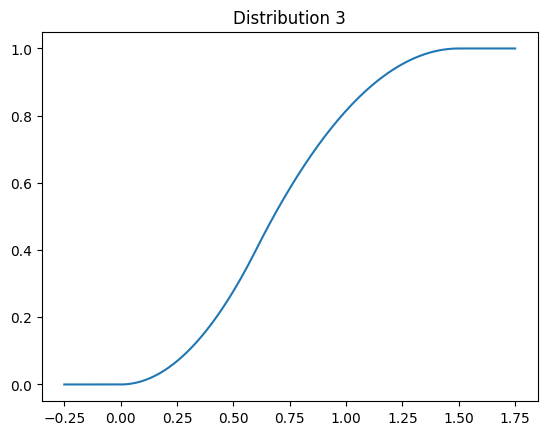

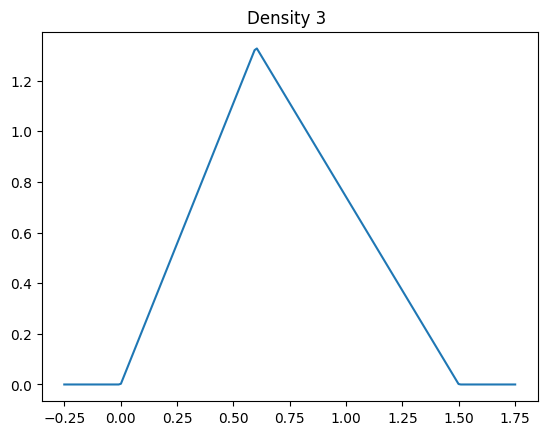

In [ ]:
a= 0
c = 0.6
b=  1.5

x = np.linspace(-0.25, 1.75, 200)
F = []
f = []

for xi in x:
    # CDF
    if xi <= a:
        F.append(0)
    elif a < xi <= c:
        F.append((xi - a)**2 / ((b - a) * (c - a)))
    elif c < xi < b:
        F.append(1 - (b - xi)**2 / ((b - a) * (b - c)))
    else:
        F.append(1)
    # PDF
    if a < xi < c:
        f.append(2 * (xi - a) / ((b - a) * (c - a)))
    elif c < xi < b:
        f.append(2 * (b - xi) / ((b - a) * (b - c)))
    else:
        f.append(0)

plt.plot(x, F); plt.title("Distribution 3"); plt.show()
plt.plot(x, f); plt.title("Density 3 "); plt.show()


4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$


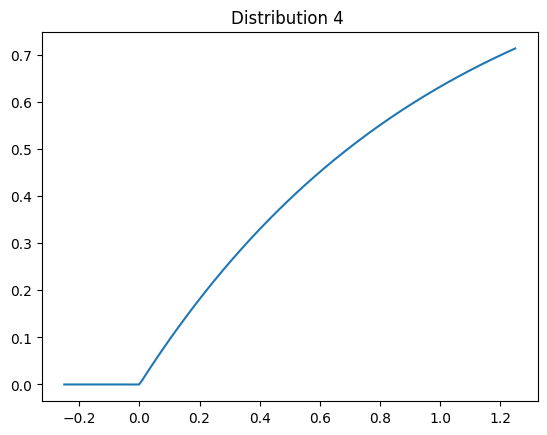

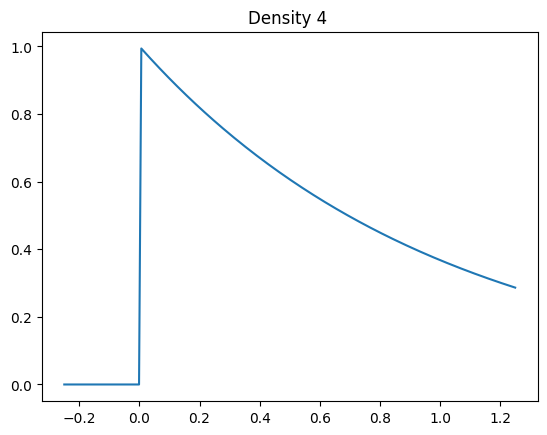

In [ ]:
x = np.linspace(-.25, 1.25, 200)
F = [0 if xi < 0 else 1 - np.exp(-xi) for xi in x]
f = [0 if xi < 0 else np.exp(-xi) for xi in x]

plt.plot(x, F); plt.title("Distribution 4 "); plt.show()
plt.plot(x, f); plt.title("Density 4 "); plt.show()


#### what about at 0 ???


5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

The code above also describes the uniform distribution

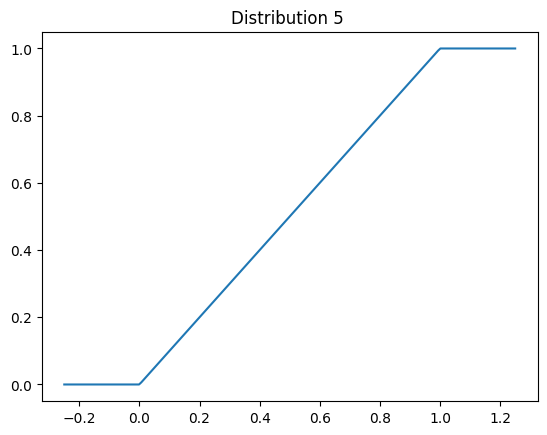

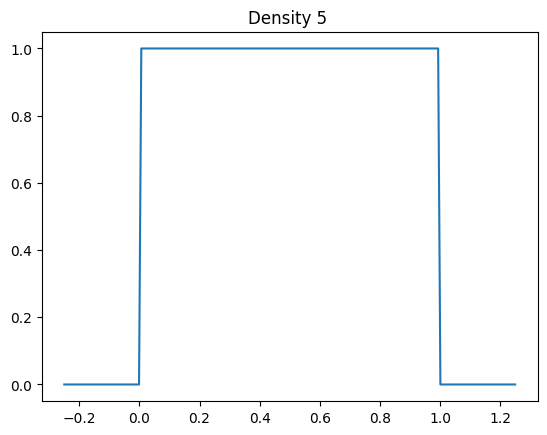

In [ ]:
x = np.linspace(-.25, 1.25, 200)
F = [0 if xi <= 0 else (1 if xi >= 1 else xi) for xi in x]
f = [1 if 0 < xi < 1 else 0 for xi in x]

plt.plot(x, F); plt.title("Distribution 5 "); plt.show()
plt.plot(x, f); plt.title("Density 5 "); plt.show()


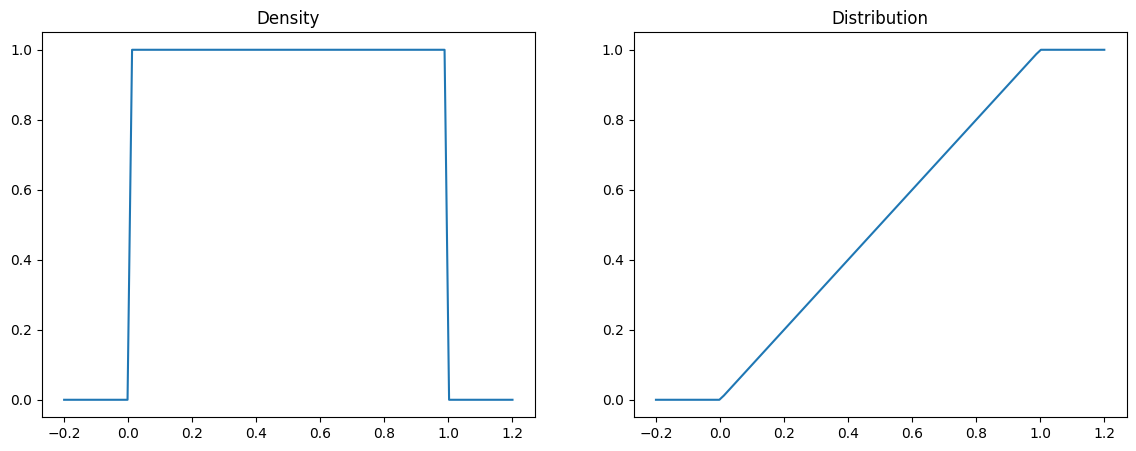

In [ ]:
import seaborn as sns
import scipy as sp
#in class code for uniform distribution
grid = np.linspace(-.2,1.2,100)

## Plot the density and distribution
pdf = sp.stats.uniform.pdf(grid)
cdf = sp.stats.uniform.cdf(grid)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

They are all distribution functions.